## Regressão simbólica aplicada ao modelo populacional de Malthuls 

In [1]:
from deap import base, creator, tools, gp
from deap.algorithms import eaSimple
import math
import numpy
import operator
import random as rd
import lmfit
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')
from sympy import Symbol, expand
from funcoes import malthus, runge_kutta
from funcoes import Div, Exp

### Solução numérica para o modelo dada pelo método de Runge-Kutta

In [2]:
T0 = 0
TF = 1
H = 0.01
X0 = 3
K = 1

T, X = runge_kutta(malthus, T0, X0, TF, H, K)

In [3]:
NUM_GERACOES = 500
TAMANHO_POP = 1000
TAMANHO_TORNEIO = 3
CHANCE_CRUZAMENTO = 0.5
CHANCE_MUTACAO = 0.03

In [4]:
pset = gp.PrimitiveSet("MAIN", 1)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(Div, 2)
pset.addPrimitive(operator.neg, 1)
#pset.addPrimitive(np.cos, 1)
#pset.addPrimitive(np.sin, 1)
pset.addPrimitive(Exp, 1)


pset.addEphemeralConstant("rand101", lambda: rd.randint(-1,1))

pset.renameArguments(ARG0='t')

In [5]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

In [6]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [7]:
def fitness(individual, points):
    # solução numérica:
    # Transformar a expressão em função:
    func = toolbox.compile(expr=individual)
    Xexpr = func(T)
    RMSE = np.sqrt(sum((Xexpr - X)**2))
    tamanho = len(str(individual))
    if tamanho > 50:
        return float('inf'),
    else:
        return (RMSE**1) * (1+tamanho/5)**0,

In [8]:
toolbox.register("evaluate", fitness, points = list(np.arange(T0, TF + H, H)))
toolbox.register("select", tools.selTournament, tournsize=TAMANHO_TORNEIO)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

In [9]:
stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
stats_size = tools.Statistics(len)
mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
mstats.register("avg", numpy.mean)
mstats.register("std", numpy.std)
mstats.register("min", numpy.min)

In [10]:
pop = toolbox.population(n=TAMANHO_POP)
hof = tools.HallOfFame(5)
pop, log = eaSimple(pop, toolbox,
                cxpb=CHANCE_CRUZAMENTO,mutpb=CHANCE_MUTACAO, 
                ngen=NUM_GERACOES , stats=mstats, halloffame=hof, verbose=True)

   	      	                fitness                	                  size                 
   	      	---------------------------------------	---------------------------------------
gen	nevals	avg    	gen	min    	nevals	std    	avg  	gen	min	nevals	std    
0  	1000  	87.1064	0  	5.06825	1000  	570.689	3.887	0  	2  	1000  	1.63836
1  	543   	73.1931	1  	5.06825	543   	892.672	3.747	1  	1  	543   	1.58965
2  	517   	inf    	2  	5.06825	517   	nan    	3.792	2  	1  	517   	1.67831
3  	523   	1.54082e+41	3  	5.06825	523   	2.7454e+42	3.856	3  	1  	523   	1.74793
4  	543   	2.73612e+41	4  	5.06825	543   	4.17812e+42	4.047	4  	1  	543   	1.72881


C:\JupyterLab\Regressão simbolica\RNAG_Trabalho_Final\funcoes.py:92: RuntimeWarning: overflow encountered in exp
  result = np.exp(x)
C:\Users\ANA220~1\AppData\Local\Temp/ipykernel_41060/1863226702.py:6: RuntimeWarning: overflow encountered in square
  RMSE = np.sqrt(sum((Xexpr - X)**2))
c:\venv\ilumpy\lib\site-packages\numpy\core\_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


5  	490   	5.40325e+40	5  	5.06825	490   	1.20701e+42	4.578	5  	2  	490   	1.82371
6  	502   	inf        	6  	1.55263	502   	nan        	4.981	6  	1  	502   	1.92578
7  	514   	inf        	7  	1.55263	514   	nan        	5.072	7  	2  	514   	1.96286
8  	512   	inf        	8  	1.55263	512   	nan        	5.015	8  	1  	512   	2.07238
9  	518   	1.73293e+41	9  	1.55263	518   	3.37428e+42	4.872	9  	1  	518   	2.0721 
10 	537   	inf        	10 	1.55263	537   	nan        	4.914	10 	1  	537   	2.21328
11 	516   	inf        	11 	1.55263	516   	nan        	5.227	11 	1  	516   	2.47335
12 	539   	inf        	12 	1.55263	539   	nan        	5.66 	12 	1  	539   	2.69822
13 	514   	inf        	13 	1.55263	514   	nan        	6.117	13 	1  	514   	2.75777
14 	515   	inf        	14 	1.55263	515   	nan        	6.525	14 	1  	515   	2.7527 
15 	500   	inf        	15 	1.55263	500   	nan        	6.782	15 	1  	500   	2.60355
16 	516   	inf        	16 	1.55263	516   	nan        	6.551	16 	1  	516   	2.24664
17 	

In [11]:
for i in hof.items:
    print(str(i))
    print()

add(mul(Exp(1), Exp(t)), mul(Exp(-1), sub(t, -1)))

add(mul(Exp(1), Exp(t)), mul(Exp(t), Exp(-1)))

add(mul(Exp(-1), Exp(t)), mul(Exp(1), Exp(t)))

add(mul(Exp(t), Exp(1)), mul(Exp(-1), Exp(t)))

add(mul(Exp(1), Exp(t)), mul(Exp(-1), Exp(t)))



### Reportando melhor individuo encontrado 

add(mul(Exp(1), Exp(t)), mul(Exp(-1), sub(t, -1)))


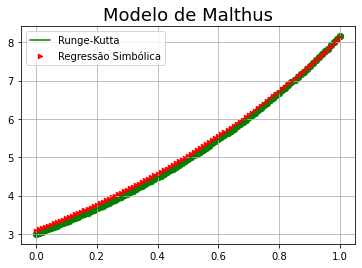

In [12]:
melhor_individuo = str(hof.items[0])
#melhor_individuo_ever = 'X0_mul(Exp(K_mul(t)))'
print(melhor_individuo)
func = toolbox.compile(expr=melhor_individuo)
Xexpr = func(T)
#func = toolbox.compile(expr=melhor_individuo_ever)
#Xbest = func(T)
fig, ax = plt.subplots(1,1)
ax.set_title('Modelo de Malthus', size = 18)
ax.scatter(T, X, c = 'g', s = 40)
ax.plot(T, X, label = 'Runge-Kutta', c = 'g')
ax.scatter(T, Xexpr, label = 'Regressão Simbólica', marker = '>', c = 'r', s = 20)
ax.plot(T, Xexpr, c = 'r')
#ax.plot(T, Xbest, label = 'Analitica', c = '0')
ax.legend()

ax.legend()
ax.grid('--')
#plt.savefig('resultados\Resultado_Malthus_1.png', dpi = 200)

### Reportando o melhor individuo encontrado

In [13]:
def Div(left, right):
    return left / right

def Exp(x):
    return sp.exp(x)

def X0_add(x):
    return x + X0

def X0_mul(x):
    return x * X0

def X0_div(x):
    return x / X0

def X0_sub(x):
    return x - X0

def K_add(x):
    return x + K

def K_mul(x):
    return x * K

def K_div(x):
    return x / K

def k_sub(x):
    return x - K

    
new_pset = gp.PrimitiveSet("MAIN", 1)

new_pset.addPrimitive(operator.add, 2)
new_pset.addPrimitive(operator.sub, 2)
new_pset.addPrimitive(operator.mul, 2)
new_pset.addPrimitive(Div, 2)
new_pset.addPrimitive(operator.neg, 1)
new_pset.addPrimitive(sp.cos, 1)
new_pset.addPrimitive(sp.sin, 1)
new_pset.addPrimitive(Exp, 1)


new_pset.addEphemeralConstant("rand102", lambda: rd.randint(-1,1))

new_pset.renameArguments(ARG0='t')
toolbox.register("compile", gp.compile, pset=new_pset)

In [14]:
func = toolbox.compile(expr=melhor_individuo)
t = Symbol('t')
X0 = Symbol('X_0')
K = Symbol('k')

In [15]:
display(sp.expand(func(t)))

t*exp(-1) + E*exp(t) + exp(-1)